8) Data Visualization I
1. Use the inbuilt dataset 'titanic'. The dataset contains 891 rows and contains information about 
the passengers who boarded the unfortunate Titanic ship. Use the Seaborn library to see if we 
can find any patterns in the data.
2. Write a code to check how the price of the ticket (column name: 'fare') for each passenger
is distributed by plotting a histogram.


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=sns.load_dataset('titanic')

In [4]:
df.shape

(891, 15)

In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 63.0+ KB


In [7]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


column deck has a lot of null values -> 203 values are non null hence it is better to drop them from the dataframe


In [11]:
df.drop('deck',axis=1,inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 61.9+ KB


In [20]:
nullvals=np.where(df['age'].isnull())[0]
for i in nullvals:
    df.drop(i,inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     714 non-null    int64   
 1   pclass       714 non-null    int64   
 2   sex          714 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        714 non-null    int64   
 5   parch        714 non-null    int64   
 6   fare         714 non-null    float64 
 7   embarked     712 non-null    object  
 8   class        714 non-null    category
 9   who          714 non-null    object  
 10  adult_male   714 non-null    bool    
 11  embark_town  712 non-null    object  
 12  alive        714 non-null    object  
 13  alone        714 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 55.2+ KB


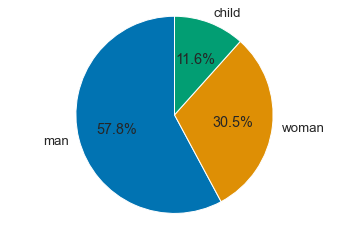

In [74]:
counts = df['who'].value_counts()
# Plot the distribution of man, woman and child using a pie chart
sns.set_style("darkgrid")
# sns.set_palette("colorblind")
sns.set_context("notebook", font_scale=1.2)
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

<AxesSubplot:xlabel='age', ylabel='Count'>

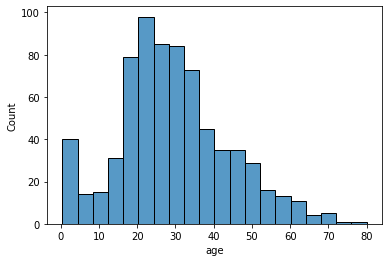

In [37]:
sns.histplot(df['age'])

maximum people in the titanic were from the age group 20-40

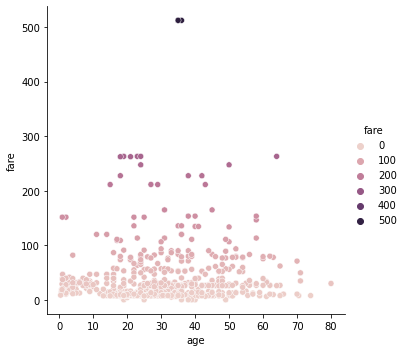

In [40]:
sns.relplot(data=df, x="age", y="fare",hue="fare")

Text(0.5, 1.0, 'Fare vs. Count')

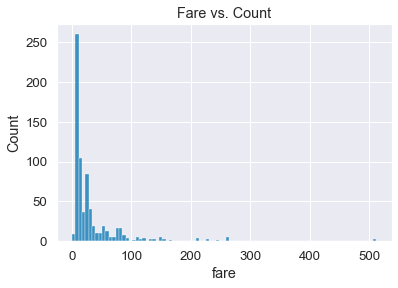

In [79]:
# the price of the ticket (column name: 'fare') for each passenger is distributed by plotting a histogram 
sns.histplot(df['fare'])
plt.title('Fare vs. Count')

Most of the fare of the titanic was $250.

In [80]:
df.groupby('embark_town').describe()['survived']
#60% of the people from cherbourg survived the crash.

,count,mean,std,min,25%,50%,75%,max
embark_town,,,,,,,,
Cherbourg,130.0,0.607692,0.490153,0.0,0.0,1.0,1.0,1.0
Queenstown,28.0,0.285714,0.460044,0.0,0.0,0.0,1.0,1.0
Southampton,554.0,0.362816,0.481247,0.0,0.0,0.0,1.0,1.0
